![IDAL](https://i.imgur.com/tIKXIG1.jpg)  

#**Máster en Inteligencia Artificial Avanzada y Aplicada:  IA^3**
---

# Ejercicio de CNN
Para estos ejercicios trabajaremos con el conjunto de datos <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a>, también disponible a través de <a href='https://pytorch.org/docs/stable/torchvision/index.html'>.<tt><strong>torchvision</strong></tt></a>. Al igual que MNIST, este conjunto de datos consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada a una etiqueta de entre 10 clases *(mantenemos los nombres en inglés)*:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANTE!</strong><br> Asegúrate de no ejecutar las celdas que hay justo encima de la salida de ejemplo que se muestra, ya que de lo contrario, acabarás escribiendo sobre la salida del ejemplo</div>

## Importaciones y carga del dataset Fashion-MNIST
PyTorch pone a disposición el conjunto de datos Fashion-MNIST a través de <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'><tt><strong>torchvision</strong></tt></a>. Como con otros datasets contenidos en la librería, la primera vez que se llame, el conjunto de datos se descargará en su ordenador en la ruta especificada. A partir de ese momento, torchvision buscará siempre una copia local antes de intentar otra descarga.

In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

## 1. Creamos los data loaders (*cargadores* de datos)
Empleamos DataLoader para crear los subconjuntos <tt>train_loader</tt> y <tt>test_loader</tt>. <br>
El tamaño de lote será 10 para ambos.

In [75]:
# TU CODIGO AQUÍ
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


In [76]:
# NO ESCRIBIR AQUÍ


## 2. Examina un lote de imágenes
Usa DataLoader, <tt>make_grid</tt> y matplotlib to visualizar el primer lote de 10 imágenes.<br>
*OPCIONAL: visualiza también las etiquetas.*

Label: [    0     8     6     2     8     4     6     3     6     2]
Class:  T-shirt Bag Shirt Sweater Bag Coat Shirt Dress Shirt Sweater


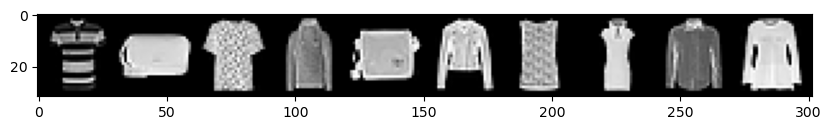

In [77]:
# TU CODIGO AQUÍ

np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array

# Grab the first batch of 10 images
for images,labels in train_loader:
    break

# Print the labels
print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

# Print the images
im = make_grid(images, nrow=10)  # the default nrow is 8
plt.figure(figsize=(10,3))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));




In [78]:
# NO ESCRIBIR AQUÍ
# SOLO IMÁGENES


In [79]:
# NO ESCRIBIR AQUÍ
# IMÁGENES Y ETIQUETAS


## Downsampling
<h3>3. Si se hace pasar una imagen de 28x28 por una capa convolucional utilizando un filtro de 5x5, un tamaño de paso de 1 y sin padding, ¿cuál es el tamaño de matriz resultante?</h3>

*24x24*

In [80]:
# Ejecuta el siguiente código para comprobar tu respuesta:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([10, 1, 28, 28])
Down size: torch.Size([10, 1, 24, 24])


### 4. Si la muestra de la pregunta 3 se pasa por una capa MaxPooling de 2x2, ¿cuál es el tamaño de matriz resultante?

*12x12*

In [81]:
# Ejecuta el siguiente código para comprobar tu respuesta:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([10, 1, 12, 12])


## Definicion de la red CNN
### 5. Definir una red neuronal convolucional
Define un modelo CNN que pueda entrenarse con el conjunto de datos Fashion-MNIST. El modelo debe contener:
+ dos capas convolucionales,
+ dos capas de agrupación (max_pooling)
+ y dos capas totalmente conectadas (FC).

Puedes utilizar cualquier número de neuronas por capa siempre que el modelo tome una imagen de 28x28 y devuelva una salida de 10. Se han rellenado partes de la definición por comodidad.

In [82]:
# TU CODIGO AQUÍ
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(1, 6, 5)
      self.conv2 = nn.Conv2d(6, 32, 3, padding=1)
      self.fc1 = nn.Linear(32*6*6, 384)
      self.fc2 = nn.Linear(384, 10)



    def forward(self, X):
      X = F.relu(self.conv1(X))
      X = F.max_pool2d(X, 2, 2)
      X = F.relu(self.conv2(X))
      X = F.max_pool2d(X, 2, 2)
      X = X.view(-1, 32*6*6)
      X = F.relu(self.fc1(X))
      X = F.log_softmax(self.fc2(X), dim=1)

      return X

torch.manual_seed(101)
model = ConvolutionalNetwork()

## Parámetros

### 6. ¿Cuál es el número total de parámetros entrenables (pesos y biases) en el modelo anterior?
Las respuestas variarán en función de la definición del modelo. Para la red definida:

<div style='border:1px black solid; padding:5px'>
$\quad\begin{split}(1\times6\times3\times3)+6+(6\times16\times3\times3)+16+(400\times100)+100+(100\times10)+10 &=\\
54+6+864+16+40000+100+1000+10 &= 42,050\end{split}$<br>
</div>

In [83]:
# Ejecuta el siguiente código para comprobar tu respuesta:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

count_parameters(model)

   150
     6
  1728
    32
442368
   384
  3840
    10
______
448518


### 7. Definimos función de pérdida & optimizador
Define una función de pérdida llamandola "criterion" y un optimizador llamándolo "optimizer".<br>
Puedes utilizar las funciones que quieras, aunque nosotros utilizamos Cross Entropy Loss y Adam (con learning rate de 0.001) respectivamente.

In [84]:
# TU CODIGO AQUÍ

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [85]:
# NO ESCRIBIR AQUÍ

### 8. Entrena el modelo
No te preocupes por el seguimiento de los valores de pérdida, la visualización de los resultados o la validación del conjunto de pruebas. Simplemente entrena el modelo durante 5 épocas. Evaluaremos el modelo entrenado en el siguiente paso.<br>
OPCIONAL: imprime algo tras cada época para ver que se está realizando el entrenamiento y hay un progreso.

In [86]:
# TU CODIGO AQUÍ

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1] #Opcional (para evaluar) Lo que hace es decir la clase con m´s probabilidades 
        batch_corr = (predicted == y_train).sum() #Opcional (para evaluar) Comparar predicciones con reales y sumar
        trn_corr += batch_corr #Opcional (para evaluar)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results Opcional (para evaluar)
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss) #Opcional (para evaluar)
    train_correct.append(trn_corr) #Opcional (para evaluar)

    with torch.no_grad(): #Desactivar el gradiente para que no lo tenga en cuenta
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
    print(f'val_acc: {tst_corr.item()*100/(10*b):7.3f}') #Opcional (para evaluar)
    loss = criterion(y_val, y_test) #Opcional (para evaluar)
    test_losses.append(loss)#Opcional (para evaluar)
    test_correct.append(tst_corr) #Opcional (para evaluar)



epoch:  0  batch: 1000 [ 10000/60000]  loss: 0.16335085  accuracy:  74.510%
epoch:  0  batch: 2000 [ 20000/60000]  loss: 0.70714056  accuracy:  78.910%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.80948478  accuracy:  80.853%
epoch:  0  batch: 4000 [ 40000/60000]  loss: 0.47217578  accuracy:  82.115%
epoch:  0  batch: 5000 [ 50000/60000]  loss: 0.04377819  accuracy:  83.160%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.48748970  accuracy:  83.888%
val_acc:  87.688
epoch:  1  batch: 1000 [ 10000/60000]  loss: 0.18080460  accuracy:  88.330%
epoch:  1  batch: 2000 [ 20000/60000]  loss: 0.18196748  accuracy:  88.775%
epoch:  1  batch: 3000 [ 30000/60000]  loss: 0.61120379  accuracy:  89.003%
epoch:  1  batch: 4000 [ 40000/60000]  loss: 0.04814577  accuracy:  89.157%
epoch:  1  batch: 5000 [ 50000/60000]  loss: 0.43728328  accuracy:  89.302%
epoch:  1  batch: 6000 [ 60000/60000]  loss: 0.17864430  accuracy:  89.303%
val_acc:  88.559
epoch:  2  batch: 1000 [ 10000/60000]  loss: 0.5028448

In [88]:
print(y_pred[1])
            

tensor([ -4.4704, -13.9265,  -5.6787,  -0.0902,  -3.7223, -10.3522,  -3.1784,
        -15.3431,  -5.2066, -10.7689], grad_fn=<SelectBackward0>)


In [89]:
print(loss)
            

tensor(0.0334)


In [91]:
print(torch.max(y_pred.data, 1))

torch.return_types.max(
values=tensor([-1.1921e-07, -9.0170e-02, -6.3810e-03, -3.4809e-05, -1.0524e-03,
         0.0000e+00, -4.4122e-03, -5.0375e-03,  0.0000e+00, -1.1921e-07]),
indices=tensor([9, 3, 8, 8, 7, 1, 3, 9, 5, 9]))


In [ ]:
# NO ESCRIBIR AQUÍ


1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Evalua el modelo
Activa el modo <tt>model.eval()</tt> y determina el porcentaje acertado correctamente del total de las 10.000 imágenes de test.

In [87]:
# TU CODIGO AQUÍ

print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(8760), tensor(8847), tensor(8885), tensor(9075), tensor(9044)]

Test accuracy: 90.440%


In [ ]:
# NO ESCRIBIR AQUÍ


Test accuracy: 8733/10000 =  87.330%


## Buen trabajo!
Puedes probar diferentes combinaciones para intentar mejorar el resultado. ¿Que elementos y parámetros puedes ajustar?<br>
Este dataset es "manejable", aprovechalo y prueba configuraciones.

## Fin del notebook

###Referencias y modelos empleados para el Notebook:

*   Documentación de [Pytorch](https://pytorch.org/docs/stable/index.html)
*   [PyTorch Tutorial for Deep Learning Researchers](https://github.com/yunjey/pytorch-tutorial) by Yunjey Choi
*   [FastAI](https://www.fast.ai/) development notebooks by Jeremy Howard.
*   Documentación y cursos en [Pierian Data](https://www.pieriandata.com/)
* Matriz de confusión: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html'>scikit-learn's confusion_matrix</a>
+ Gráficos: <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps</a>, and <a href='https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html'>matplotlib colormaps</a>.